In [102]:
#Importing the packages

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



In [5]:
#Reading the data

df = pd.read_csv(r'C:\Users\Nelmara\Documents\PORTIFOLIO NEL\MESTRADO NEL\Density.csv')

In [6]:
#Looking the data

df

,Stocking Density,Survival Rate,Mortality Rate,Canibalism,Specific Growth Rate,Final Total Length,Final Weight
0,60,"97,70%","0,70%","1,40%","11,80%","24,10","0,10"
1,120,"95,20%","2,20%","2,50%","11,50%","24,40","0,10"
2,180,"97,60%","1,40%","0,80%","11,50%","23,80","0,10"
3,240,"97,20%","1,70%","1,00%","11,10%","23,30","0,10"
4,300,"95,70%","1,60%","3,10%","11,60%","23,90","0,10"


In [7]:
#Searching for null or missing values

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Stocking Density - 0%
Survival Rate - 0%
Mortality Rate - 0%
Canibalism - 0%
Specific Growth Rate - 0%
Final Total Length - 0%
Final Weight - 0%


In [8]:
#Checking data types in columns

print(df.dtypes)

Stocking Density         int64
Survival Rate           object
Mortality Rate          object
Canibalism              object
Specific Growth Rate    object
Final Total Length      object
Final Weight            object
dtype: object


In [81]:
#Correcting the data type in colums

df.replace('%',' ', regex=True, inplace=True)
df.replace(',','.', regex=True, inplace=True)
#df.replace('%',' ', inplace=True)
print(df.dtypes)
#df.replace('%',' ', regex=True)
#df['Mortality Rate'].str.replace('%','')
#df['Canibalism'].str.replace('%','')
#df['Specific Growth Rate'].str.replace('%','')


Stocking Density         int64
Survival Rate           object
Mortality Rate          object
Canibalism              object
Specific Growth Rate    object
Final Total Length      object
Final Weight            object
dtype: object


In [131]:
#Changing the data type of columns

cols = ['Survival Rate','Mortality Rate','Canibalism','Specific Growth Rate','Final Total Length','Final Weight']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)


In [137]:
print(df.dtypes)

Stocking Density          int64
Survival Rate           float64
Mortality Rate          float64
Canibalism              float64
Specific Growth Rate    float64
Final Total Length      float64
Final Weight            float64
dtype: object


In [138]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

,Stocking Density,Survival Rate,Mortality Rate,Canibalism,Specific Growth Rate,Final Total Length,Final Weight
Stocking Density,1.000000,-2.745140e-01,0.377168,0.301473,-4.961389e-01,-0.583874,NaN
Survival Rate,-0.274514,1.000000e+00,-0.771756,-0.882904,2.362643e-16,-0.502216,NaN
Mortality Rate,0.377168,-7.717561e-01,1.000000,0.406948,-5.577850e-01,0.090346,NaN
Canibalism,0.301473,-8.829044e-01,0.406948,1.000000,3.247302e-01,0.524979,NaN
Specific Growth Rate,-0.496139,2.362643e-16,-0.557785,0.324730,1.000000e+00,0.724207,NaN
Final Total Length,-0.583874,-5.022159e-01,0.090346,0.524979,7.242068e-01,1.000000,NaN
Final Weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN


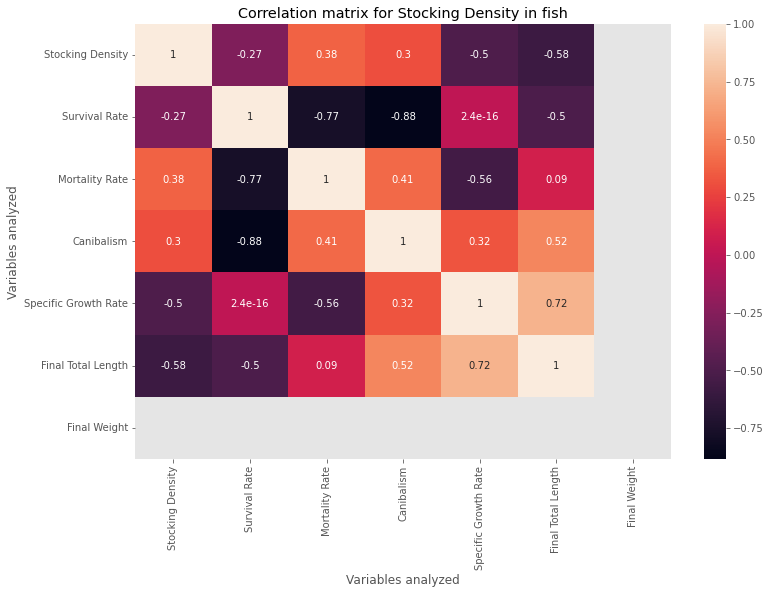

In [141]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Stocking Density in fish")

plt.xlabel("Variables analyzed")

plt.ylabel("Variables analyzed")

plt.show()

In [174]:
df.corr(method ='pearson')
correlation_matrix = df.corr()
correlation_pairs = correlation_matrix.unstack()

print(correlation_pairs)

Stocking Density      Stocking Density        1.000000e+00
                      Survival Rate          -2.745140e-01
                      Mortality Rate          3.771683e-01
                      Canibalism              3.014734e-01
                      Specific Growth Rate   -4.961389e-01
                      Final Total Length     -5.838742e-01
                      Final Weight                     NaN
Survival Rate         Stocking Density       -2.745140e-01
                      Survival Rate           1.000000e+00
                      Mortality Rate         -7.717561e-01
                      Canibalism             -8.829044e-01
                      Specific Growth Rate    2.362643e-16
                      Final Total Length     -5.022159e-01
                      Final Weight                     NaN
Mortality Rate        Stocking Density        3.771683e-01
                      Survival Rate          -7.717561e-01
                      Mortality Rate          1.000000e+

In [175]:
#Taking a look at the ones that have a high correlation (> 0.5)

sorted_pairs =correlation_pairs.sort_values(kind="quicksort")

print(sorted_pairs)



Survival Rate         Canibalism             -8.829044e-01
Canibalism            Survival Rate          -8.829044e-01
Survival Rate         Mortality Rate         -7.717561e-01
Mortality Rate        Survival Rate          -7.717561e-01
Final Total Length    Stocking Density       -5.838742e-01
Stocking Density      Final Total Length     -5.838742e-01
Mortality Rate        Specific Growth Rate   -5.577850e-01
Specific Growth Rate  Mortality Rate         -5.577850e-01
Survival Rate         Final Total Length     -5.022159e-01
Final Total Length    Survival Rate          -5.022159e-01
Specific Growth Rate  Stocking Density       -4.961389e-01
Stocking Density      Specific Growth Rate   -4.961389e-01
                      Survival Rate          -2.745140e-01
Survival Rate         Stocking Density       -2.745140e-01
Specific Growth Rate  Survival Rate           2.362643e-16
Survival Rate         Specific Growth Rate    2.362643e-16
Mortality Rate        Final Total Length      9.034618e-

In [176]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

Survival Rate         Canibalism             -0.882904
Canibalism            Survival Rate          -0.882904
Survival Rate         Mortality Rate         -0.771756
Mortality Rate        Survival Rate          -0.771756
Final Total Length    Stocking Density       -0.583874
Stocking Density      Final Total Length     -0.583874
Mortality Rate        Specific Growth Rate   -0.557785
Specific Growth Rate  Mortality Rate         -0.557785
Survival Rate         Final Total Length     -0.502216
Final Total Length    Survival Rate          -0.502216
Canibalism            Final Total Length      0.524979
Final Total Length    Canibalism              0.524979
                      Specific Growth Rate    0.724207
Specific Growth Rate  Final Total Length      0.724207
Stocking Density      Stocking Density        1.000000
Canibalism            Canibalism              1.000000
Mortality Rate        Mortality Rate          1.000000
Survival Rate         Survival Rate           1.000000
Specific G

In [142]:
# Using factorize - this assigns a random numeric value for each unique categorical value


df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,Stocking Density,Survival Rate,Mortality Rate,Canibalism,Specific Growth Rate,Final Total Length,Final Weight
Stocking Density,1.000000,1.000000,1.000000,1.000000,0.970725,1.000000,NaN
Survival Rate,1.000000,1.000000,1.000000,1.000000,0.970725,1.000000,NaN
Mortality Rate,1.000000,1.000000,1.000000,1.000000,0.970725,1.000000,NaN
Canibalism,1.000000,1.000000,1.000000,1.000000,0.970725,1.000000,NaN
Specific Growth Rate,0.970725,0.970725,0.970725,0.970725,1.000000,0.970725,NaN
Final Total Length,1.000000,1.000000,1.000000,1.000000,0.970725,1.000000,NaN
Final Weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN


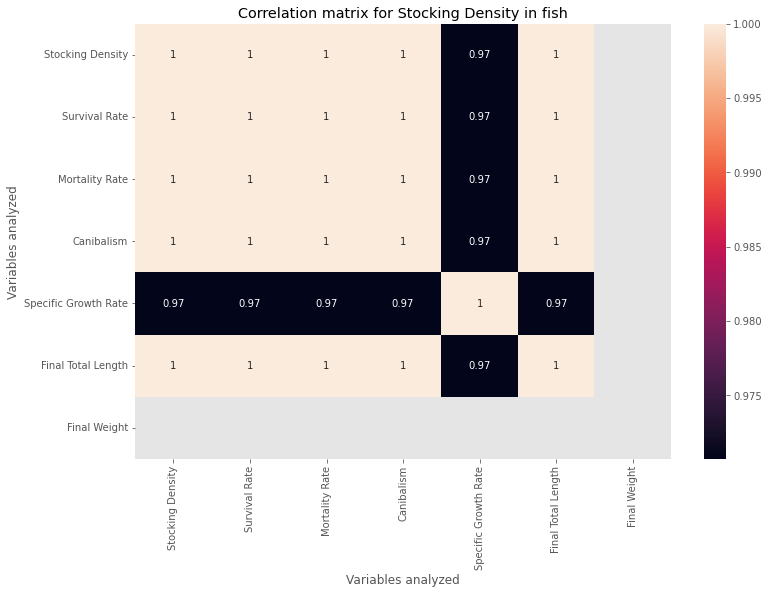

In [143]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Stocking Density in fish")

plt.xlabel("Variables analyzed")

plt.ylabel("Variables analyzed")

plt.show()


In [150]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

Stocking Density      Stocking Density        1.000000
                      Survival Rate           1.000000
                      Mortality Rate          1.000000
                      Canibalism              1.000000
                      Specific Growth Rate    0.970725
                      Final Total Length      1.000000
                      Final Weight                 NaN
Survival Rate         Stocking Density        1.000000
                      Survival Rate           1.000000
                      Mortality Rate          1.000000
                      Canibalism              1.000000
                      Specific Growth Rate    0.970725
                      Final Total Length      1.000000
                      Final Weight                 NaN
Mortality Rate        Stocking Density        1.000000
                      Survival Rate           1.000000
                      Mortality Rate          1.000000
                      Canibalism              1.000000
          

In [151]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

Specific Growth Rate  Mortality Rate          0.970725
Mortality Rate        Specific Growth Rate    0.970725
Canibalism            Specific Growth Rate    0.970725
Stocking Density      Specific Growth Rate    0.970725
Specific Growth Rate  Final Total Length      0.970725
                      Stocking Density        0.970725
                      Canibalism              0.970725
Final Total Length    Specific Growth Rate    0.970725
Survival Rate         Specific Growth Rate    0.970725
Specific Growth Rate  Survival Rate           0.970725
Canibalism            Canibalism              1.000000
                      Final Total Length      1.000000
Stocking Density      Stocking Density        1.000000
Final Total Length    Stocking Density        1.000000
                      Survival Rate           1.000000
                      Mortality Rate          1.000000
                      Canibalism              1.000000
Specific Growth Rate  Specific Growth Rate    1.000000
Canibalism

In [178]:
# Looking at the top 3 stocking densities by Survival Rate

SurvivalRateSum = df.groupby('Stocking Density')[["Survival Rate"]].sum()

SurvivalRateSumSorted = SurvivalRateSum.sort_values('Survival Rate', ascending = False)[:3]

SurvivalRateSumSorted =SurvivalRateSumSorted['Survival Rate'].astype('float') 

SurvivalRateSumSorted





Stocking Density
60     97.7
180    97.6
240    97.2
Name: Survival Rate, dtype: float64

<AxesSubplot:xlabel='Stocking Density', ylabel='Survival Rate'>

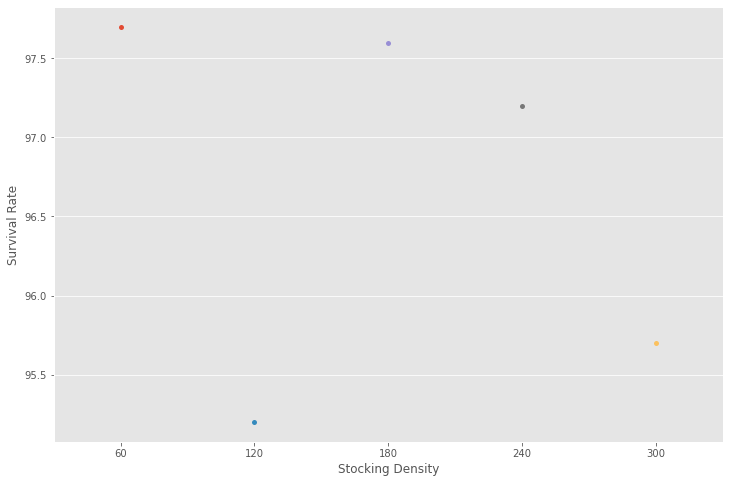

In [219]:
sns.swarmplot(x='Stocking Density', y='Survival Rate', data = df)


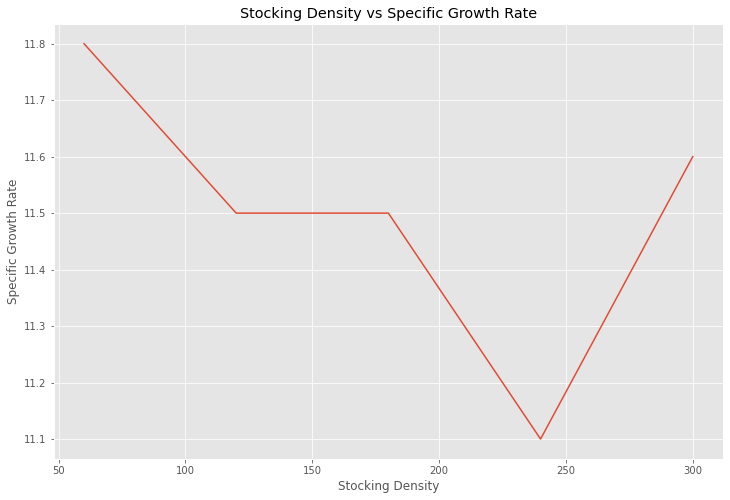

In [200]:
import matplotlib.pyplot as plt
plt.plot("Stocking Density", "Specific Growth Rate", data = df)
plt.title('Stocking Density vs Specific Growth Rate')
plt.xlabel('Stocking Density')
plt.ylabel('Specific Growth Rate')
plt.show()